This notebook tests out the basic LM-fitting capabilities, and MCMC too.

In [8]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

from transit.TLC import TLC
from transit.TM import TM
from transit.Planet import Planet
from transit.Star import Star
from transit.Instrument import Instrument

p = Planet()
s = Star()
i_temp = Instrument()

bjd = np.linspace(p.t0.value - p.duration*1, p.t0.value + p.duration*1, 300)
t = bjd - np.mean(bjd)

fluxerr = 0.002*np.ones_like(bjd)
tlc = TLC(bjd, np.ones_like(bjd)*(1 + t + t**2), fluxerr, remake=True,
              directory='otherexample/', telescope='Galileo', epoch=0)
#other = TLC(directory='example/', telescope='Galileo', epoch=0)

tm = TM(planet=p, star=s, instrument=i_temp, directory='example/')
tlc.linkModel(tm)


m = tm.planet_model(t=bjd)
tlc.flux = (m+np.random.normal(0, 1, len(bjd))*fluxerr)*(1 + 0.01*t + 0.01*t**2)

i = Instrument(tlc=tlc, torder=2)
tm.instrument = i
# let's float a few parameters
tm.planet.rp_over_rs.float(0.09, [0.05, 0.15])
tm.planet.rsovera.float(0.09, [0.05, 0.2])
tm.instrument.C.float(1.001, [0.99,1.01])
tm.instrument.t_tothe1.float(0.01, [-1, 1])
tm.instrument.t_tothe2.float(0.01, [-1, 1])


tm.defineParameterList()
tm.floating

{'C': 1.0, 'rescaling': 1.0}
{'t_tothe2': 0.0, 'C': 0.9962173054387373, 'rescaling': 1.0, 't_tothe1': 0.0}


['rsovera', 'k', 'C', 't_tothe2', 't_tothe1']

In [10]:
# do a fast fit
tm.fastfit(remake=True)

           [lm] performing a fast LM fit
           [lm]     rsovera
           [lm]     k
           [lm]     C
           [lm]     t_tothe2
           [lm]     t_tothe1
           [tm] using atmosphere model as prior on LD coefficients
           [lm] running lmfit minimization


KeyError: 't'

In [11]:
tlc._normalized

{}

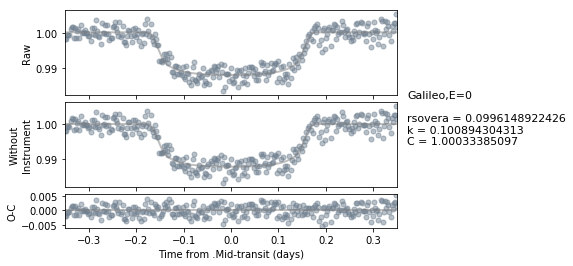

In [3]:
from transit.plots.SingleTransitPlot import SingleTransitPlot
SingleTransitPlot(tlc=tlc)

/Users/zkbt/anaconda3/envs/transit/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


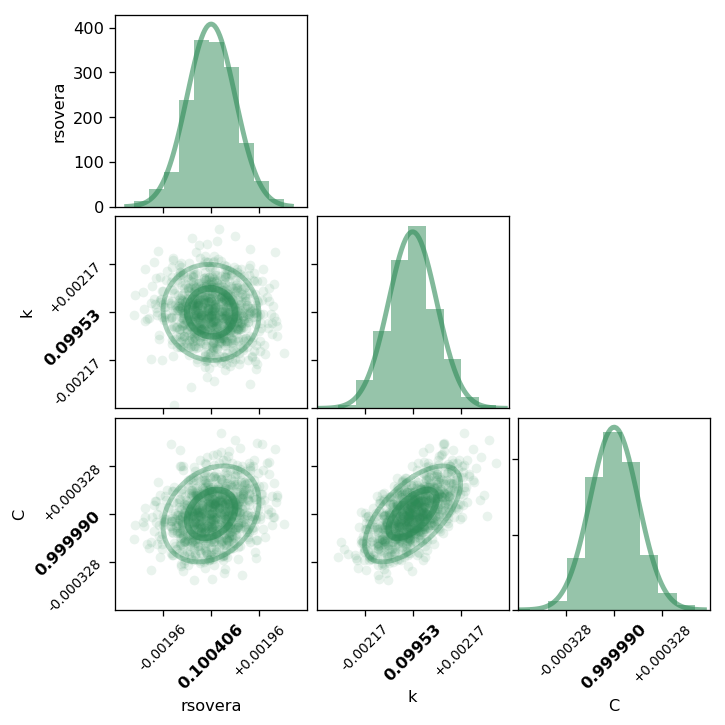

In [4]:
tm.fitter.pdf.simulateSamples(n=1000)
tm.fitter.pdf.plot(plotcovariance=True, onesigmalabels=True, nbins=10)

In [9]:
tm.fitter.pdf.printParameters()

      [sampled] C = $0.999754 \pm 0.000159$
      [sampled] k = $0.09854 \pm 0.0011$
      [sampled] rescaling = $0.997 \pm 0.042$
      [sampled] rsovera = $0.0998 \pm 0.00105$
